
# Table of Contents

1. [Problem Statement](#Problem-Statement)
2. [Data Understanding](#Data-Understanding)
3. [Data Cleaning](#Data-Cleaning)
4. [Data Analysis](#Data-Analysis)
5. [Recommendation](#Recommendation)


## Problem Statement

Aim of this case study is to understand the **driving factors** behind loan default, i.e. the variables which are strong indicators of default.

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. Two types of risks are associated with the bank's decision:

- If the applicant is **likely to repay the loan**, then not approving the loan results in a loss of business to the company

- If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to financial loss for the company.


The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of a loan, lending (to risky applicants) at a higher interest rate, etc.


## Data Understanding

Dataset contains the complete Loan data for all the loans issued through the time period **2007** to **2011**. It has around 39717 rows and 111 columns.

### Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

sns.set_theme(style = 'white')


### Load Dataset

Read loan data and print first 10 rows.

In [2]:
df = pd.read_csv('data/loan.csv', low_memory = False)
df.shape

(39717, 111)

In [3]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87000,B,B2,NaN,10+ years,RENT,24000.00000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65000,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00000,0.00000,5863.15519,5833.84000,5000.00000,863.16000,0.00000,0.00000,0.00000,Jan-15,171.62000,NaN,May-16,0.00000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83000,C,C4,Ryder,< 1 year,RENT,30000.00000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00000,0.00000,1008.71000,1008.71000,456.46000,435.17000,0.00000,117.08000,1.11000,Apr-13,119.66000,NaN,Sep-13,0.00000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33000,C,C5,NaN,10+ years,RENT,12252.00000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72000,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00000,0.00000,3005.66684,3005.67000,2400.00000,605.67000,0.00000,0.00000,0.00000,Jun-14,649.91000,NaN,May-16,0.00000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00000,0,Feb-96,1,35.00000,NaN,10,0,5598,21%,37,f,0.00000,0.00000,12231.89000,12231.89000,10000.00000,2214.92000,16.97000,

### Generate metadata for the Loan data set, including following details:
1. Column Name
2. Data Type
3. Number of missing values
4. Percentage of missing values
5. Number of Unique values
6. Column Description

In [4]:
def generate_metadata(dd):
    ## Generate metadata for each columm such as data type, number of missing and unique values
    columns = pd.DataFrame(dd.columns, columns = ['column_name'])
    columns['Data Type'] = dd.dtypes.values
    columns['Missing'] = dd.isnull().sum().values
    columns['Percentage Missing'] = (columns['Missing'] / len(dd.index)) * 100
    columns['Unique'] = dd.nunique().values

    ## Load Data Dictionary for column description
    dictionary = pd.read_excel('data/Data_Dictionary.xlsx')
    dictionary['LoanStatNew'] = dictionary['LoanStatNew'].str.strip()
    dictionary.loc[dictionary['LoanStatNew'] == 'verified_status_joint', 'LoanStatNew'] = 'verification_status_joint'
    dictionary = dictionary[~dictionary['LoanStatNew'].isna()]

    ## Merge columns and dictionary dataframe to create final metadata
    metadata = pd.merge(how = 'left', left = columns, right = dictionary, left_on = 'column_name', right_on = 'LoanStatNew')
    metadata.drop(columns  = ['LoanStatNew'], inplace = True)

    ## Add TOP N Values for each column
    def top_n_values(column, n):
        return pd.DataFrame(dd[column].value_counts()).head(n).to_dict()

    metadata['Top N'] = metadata['column_name'].map(lambda x: top_n_values(x, 10))
    return metadata
    
metadata = generate_metadata(df)
metadata['is_dropped'] = False

In [5]:
## Print Column metadata
pd.set_option('display.max_colwidth', None)
metadata

,column_name,Data Type,Missing,Percentage Missing,Unique,Description,Top N,is_dropped
0,id,int64,0,0.00000,39717,A unique LC assigned ID for the loan listing.,"{'id': {1077501: 1, 568534: 1, 568659: 1, 567165: 1, 568531: 1, 568623: 1, 568605: 1, 556021: 1, 568568: 1, 568525: 1}}",False
1,member_id,int64,0,0.00000,39717,A unique LC assigned Id for the borrower member.,"{'member_id': {1296599: 1, 731393: 1, 731544: 1, 729629: 1, 731390: 1, 731500: 1, 731481: 1, 716015: 1, 731438: 1, 731382: 1}}",False
2,loan_amnt,int64,0,0.00000,885,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.","{'loan_amnt': {10000: 2833, 12000: 2334, 5000: 2051, 6000: 1908, 15000: 1895, 20000: 1626, 8000: 1586, 25000: 1390, 4000: 1130, 3000: 1030}}",False
3,funded_amnt,int64,0,0.00000,1041,The total amount committed to that loan at that point in time.,"{'funded_amnt': {10000: 2741, 12000: 2244, 5000: 2040, 6000: 1898, 15000: 1784, 8000: 1573, 20000: 1456, 25000: 1133, 4000: 1127, 3000: 1022}}",False
4,funded_amnt_inv,float64,0,0.00000,8205,The total amount committed by investors for that loan at that point in time.,"{'funded_amnt_inv': {5000.0: 1309, 10000.0: 1275, 6000.0: 1200, 12000.0: 1069, 8000.0: 900, 4000.0: 812, 3000.0: 803, 15000.0: 657, 7000.0: 600, 2000.0: 452}}",False
5,term,object,0,0.00000,2,The number of payments on the loan. Values are in months and can be either 36 or 60.,"{'term': {' 36 months': 29096, ' 60 months': 10621}}",False
6,int_rate,object,0,0.00000,371,Interest Rate on the loan,"{'int_rate': {'10.99%': 956, '13.49%': 826, '11.49%': 825, '7.51%': 787, '7.88%': 725, '7.49%': 656, '11.71%': 607, '9.99%': 603, '7.90%': 582, '5.42%': 573}}",False
7,installment,float64,0,0.00000,15383,The monthly payment owed by the borrower if the loan originates.,"{'installment': {311.11: 68, 180.96: 59, 311.02: 54, 150.8: 48, 368.45: 46, 372.12: 45, 330.76: 43, 339.31: 42, 301.6: 41, 317.72: 41}}",False
8,grade,object,0,0.00000,7,LC assigned loan grade,"{'grade': {'B': 12020, 'A': 10085, 'C': 8098, 'D': 5307, 'E': 2842, 'F': 1049, 'G': 316}}",False
9,sub_grade,object,0,0.00000,35,LC assigned loan subgrade,"{'sub_grade': {'B3': 2917, 'A4': 2886, 'A5': 2742, 'B5': 2704, 'B4': 2512, 'C1': 2136, 'B2': 2057, 'C2': 2011, 'B1': 1830, 'A3': 1810}}",False


### Missing Values

There are around 57 columns with more than 60% missing values.

In [6]:
missing_value_threshold = 60
columns_with_high_missing_values = metadata[metadata['Percentage Missing'] >= missing_value_threshold]['column_name'].values

metadata[metadata['column_name'].isin(columns_with_high_missing_values)]
columns_to_drop = list(columns_with_high_missing_values)

### All unique values

Columns with all unique values can be dropped since it will not add any meaningful information for analysis

In [7]:
### Identify column names with all unique values and drop from the main dataframe
columns_all_unique = metadata[metadata['Unique'] == 39717]['column_name'].values

metadata[metadata['column_name'].isin(columns_all_unique)]
columns_to_drop += list(columns_all_unique)

### Same value in all rows

Columns with same value in all the rows can be dropped before analysis

In [8]:
columns_same_value = metadata[metadata['Unique'] == 1]['column_name'].values
metadata[metadata['column_name'].isin(columns_same_value)]

columns_to_drop += list(columns_same_value)

### Drop description and zip_code columns

We can drop following columns since it will not add any information for analysis:

desc - Description about each loan
zip_cde - First 3 digits of zip code is only visible.

In [9]:
columns_to_drop += ['desc', 'zip_code']

### Drop variables that are related to customer behaviour

Following variables are related to customer behaviour and not available at the time of loan application:

1. delinq_2years
2. earliest_cr_line
3. inq_last_6mnths
4. open_acc
5. pub_rec
6. revol_bal
7. revol_util
8. total_acc
9. out_prncp
10. out_prncp_inv
11. total_pymnt
12. total_pymnt_inv
13. total_rec_prncp
14. total_rec_int
15. total_rec_late_fee
16. recoveries
17. collection_recovery_fee
18. last_pymnt_d
19. last_pymnt_amnt
20. last_credit_pull_d

In [10]:
columns_to_drop += [
  'delinq_2yrs'
, 'inq_last_6mths'
, 'earliest_cr_line'
, 'open_acc'
, 'pub_rec'
, 'revol_bal'
, 'revol_util'
, 'total_acc'
, 'out_prncp'
, 'out_prncp_inv'
, 'total_pymnt'
, 'total_pymnt_inv'
, 'total_rec_prncp'
, 'total_rec_int'
, 'total_rec_late_fee'
, 'recoveries'
, 'collection_recovery_fee'
, 'last_pymnt_d'
, 'last_pymnt_amnt'
, 'last_credit_pull_d'
]

### Drop redundant column title

Title is a redundant column, since purpose gives similar detail.

In [11]:
df[['title', 'purpose']]

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
4,Personal,other
...,...,...
39712,Home Improvement,home_improvement
39713,Retiring credit card debt,credit_card
39714,MBA Loan Consolidation,debt_consolidation
39715,JAL Loan,other


In [12]:
columns_to_drop += ['title']

## Data Cleaning

Drop Columns which are not required for the analysis:

1. More than 60% missing values
2. same values in all the rows
3. Unique value in all the rows
4. Additional columns which donot add any useful information
5. customer behaviour variables


In [13]:
df.drop(columns = columns_to_drop, inplace = True)
metadata.loc[metadata['column_name'].isin(columns_to_drop), 'is_dropped'] = True

#### Cleanup Column: term 

Description: The number of payments on the loan. Values are in months and can be either 36 or 60.

The actual data has type 'object' due to string suffix.

This column can be converted to int and can be renamed to term_months

In [14]:
metadata[metadata['column_name'] == 'term']

,column_name,Data Type,Missing,Percentage Missing,Unique,Description,Top N,is_dropped
5,term,object,0,0.00000,2,The number of payments on the loan. Values are in months and can be either 36 or 60.,"{'term': {' 36 months': 29096, ' 60 months': 10621}}",False


In [15]:
df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [16]:
df['term'] = df['term'].str.replace(' months', '').astype(int)
df.rename(columns = {'term': 'term_months'}, inplace = True)
## Fix metadata dataframe to reflect new data type and column name
metadata.loc[metadata['column_name'] == 'term', 'column_name'] = 'term_months'
metadata.loc[~metadata['is_dropped'], 'Data Type'] = df.dtypes.values

In [17]:
metadata[metadata['column_name'] == 'term_months']

,column_name,Data Type,Missing,Percentage Missing,Unique,Description,Top N,is_dropped
5,term_months,int32,0,0.00000,2,The number of payments on the loan. Values are in months and can be either 36 or 60.,"{'term': {' 36 months': 29096, ' 60 months': 10621}}",False


In [18]:
df['term_months'].value_counts()

36    29096
60    10621
Name: term_months, dtype: int64

#### Cleanup Column: int_rate
Description: Interest Rate on the loan 

This column is object data type due to '%' character in the dataset, remove the character and cast it as float

In [19]:
metadata[metadata['column_name'] == 'int_rate']

,column_name,Data Type,Missing,Percentage Missing,Unique,Description,Top N,is_dropped
6,int_rate,object,0,0.00000,371,Interest Rate on the loan,"{'int_rate': {'10.99%': 956, '13.49%': 826, '11.49%': 825, '7.51%': 787, '7.88%': 725, '7.49%': 656, '11.71%': 607, '9.99%': 603, '7.90%': 582, '5.42%': 573}}",False


In [20]:
df['int_rate'] = df['int_rate'].str.replace('%', '').astype('float')
## Fix metadata data type
metadata.loc[~metadata['is_dropped'], 'Data Type'] = df.dtypes.values

In [21]:
metadata[metadata['column_name'] == 'int_rate']

,column_name,Data Type,Missing,Percentage Missing,Unique,Description,Top N,is_dropped
6,int_rate,float64,0,0.00000,371,Interest Rate on the loan,"{'int_rate': {'10.99%': 956, '13.49%': 826, '11.49%': 825, '7.51%': 787, '7.88%': 725, '7.49%': 656, '11.71%': 607, '9.99%': 603, '7.90%': 582, '5.42%': 573}}",False


### Cleanup Column: emp_length

Description: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

Data type for this column in pandas dataframe is object and can be converted to int.

In [22]:
metadata[metadata['column_name'] == 'emp_length']

,column_name,Data Type,Missing,Percentage Missing,Unique,Description,Top N,is_dropped
11,emp_length,object,1075,2.70665,11,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.,"{'emp_length': {'10+ years': 8879, '< 1 year': 4583, '2 years': 4388, '3 years': 4095, '4 years': 3436, '5 years': 3282, '1 year': 3240, '6 years': 2229, '7 years': 1773, '8 years': 1479}}",False


In [23]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [24]:
def cleanup_emp_length(s):
    t = s.strip('+years ')
    if t == '< 1':
        return 0
    else:
        return int(t)

    
df.loc[~df['emp_length'].isna(), 'emp_length'] = df[~df['emp_length'].isna()]['emp_length'].map(lambda s: cleanup_emp_length(s))
df.rename(columns = {'emp_length': 'emp_length_years'}, inplace = True)

## Fix metadata dataframe
metadata.loc[metadata['column_name'] == 'emp_length', 'column_name'] = 'emp_length_years'

In [25]:
df['emp_length_years'].value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length_years, dtype: int64

### Impute missing values : emp_length_years

Dataset has **2.71%** rows which have missing values for emp_length_years. This is a categorical variable so we can impute mode inplace of missing values

In [26]:
print(f"Percentage of rows having null values: {round((df['emp_length_years'].isnull().sum() / len(df.index)) * 100, 2)}")
print(f"Impute mode inplace of missing values: {df['emp_length_years'].mode()[0]}")

df['emp_length_years'] = df['emp_length_years'].fillna(df['emp_length_years'].mode()[0])

Percentage of rows having null values: 2.71
Impute mode inplace of missing values: 10


### Cleanup Column: emp_title

emp_title column has missing values in 6% of the rows. We can drop rows where this column is NULL

In [27]:
df.dropna(subset = ['emp_title'], inplace = True)

### Cleanup Column: pub_rec_bankruptcies

pub_rec_bankruptcies column has missing values in 2% of the rows, we can drop rows where this column in NULL.

In [28]:
df.dropna(subset = ['pub_rec_bankruptcies'], inplace = True)

### Filter rows not required for analysis:

Loan status can have 3 possible values:

1. **Fully Paid**: Applicant has fully paid the loan ( the principal and the interest)
2. **Charged Off**: Applicant has not paid the installment in due time.
3. **Current**: Applicant is in process of paying the installments. These candidates are not labelled as defaults.

We can filter all rows which have loan status as **Current** and create a new derived metric **is_default** which will have 0 for 'Fully paid' rows and 1 for 'Charged Off'.


In [29]:
df = df[df['loan_status'] != 'Current']
df['is_default'] = df['loan_status'].map(lambda status: 0 if status == 'Fully Paid' else 1)

### Add new derived metrics

Add new metrics issue_month and issue_year from issue_d column. After adding new metrics we can drop issue_d column.

In [30]:
df['issue_year'] = pd.to_datetime(df['issue_d'], format = '%b-%y').dt.year
df['issue_month'] = pd.to_datetime(df['issue_d'], format = '%b-%y').dt.month
df.drop(columns = ['issue_d'], inplace = True)

### Rename column - dti to debt_to_inc

Rename column to make it more meaningful

In [31]:
df.rename(columns = {'dti': 'debt_to_inc'}, inplace = True)

### Metadata after cleanup

In [32]:
metadata = generate_metadata(df)
metadata.loc[metadata['column_name'] == 'is_default', 'Description'] = '0 -> Fully Paid and 1 -> Charged Off'
metadata.loc[metadata['column_name'] == 'issue_month', 'Description'] = 'The month in which the loan was funded'
metadata.loc[metadata['column_name'] == 'issue_year', 'Description'] = 'The Year in which the loan was funded'
metadata.loc[metadata['column_name'] == 'debt_to_inc', 'Description'] = 'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.'

metadata

,column_name,Data Type,Missing,Percentage Missing,Unique,Description,Top N
0,loan_amnt,int64,0,0.00000,849,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.","{'loan_amnt': {10000: 2594, 12000: 2122, 5000: 1832, 6000: 1751, 15000: 1705, 8000: 1446, 20000: 1438, 25000: 1214, 4000: 1014, 7000: 931}}"
1,funded_amnt,int64,0,0.00000,1003,The total amount committed to that loan at that point in time.,"{'funded_amnt': {10000: 2510, 12000: 2039, 5000: 1821, 6000: 1739, 15000: 1603, 8000: 1436, 20000: 1276, 4000: 1012, 25000: 990, 7000: 920}}"
2,funded_amnt_inv,float64,0,0.00000,7342,The total amount committed by investors for that loan at that point in time.,"{'funded_amnt_inv': {5000.0: 1190, 10000.0: 1190, 6000.0: 1111, 12000.0: 975, 8000.0: 826, 4000.0: 735, 3000.0: 728, 15000.0: 590, 7000.0: 551, 2000.0: 410}}"
3,term_months,int32,0,0.00000,2,NaN,"{'term_months': {36: 26516, 60: 9021}}"
4,int_rate,float64,0,0.00000,334,Interest Rate on the loan,"{'int_rate': {10.99: 862, 11.49: 739, 7.51: 736, 13.49: 711, 7.88: 676, 7.49: 613, 9.99: 555, 7.9: 531, 11.71: 528, 5.42: 507}}"
5,installment,float64,0,0.00000,14079,The monthly payment owed by the borrower if the loan originates.,"{'installment': {311.11: 65, 311.02: 53, 180.96: 52, 368.45: 43, 150.8: 43, 372.12: 42, 186.61: 41, 339.31: 41, 330.76: 41, 317.72: 40}}"
6,grade,object,0,0.00000,7,LC assigned loan grade,"{'grade': {'B': 10754, 'A': 9163, 'C': 7225, 'D': 4700, 'E': 2501, 'F': 908, 'G': 286}}"
7,sub_grade,object,0,0.00000,35,LC assigned loan subgrade,"{'sub_grade': {'A4': 2668, 'B3': 2596, 'A5': 2494, 'B5': 2451, 'B4': 2254, 'C1': 1879, 'B2': 1829, 'C2': 1804, 'A3': 1634, 'B1': 1624}}"
8,emp_title,object,0,0.00000,27551,The job title supplied by the Borrower when applying for the loan.*,"{'emp_title': {'US Army': 129, 'Bank of America': 106, 'IBM': 65, 'AT&T': 57, 'Kaiser Permanente': 55, 'Wells Fargo': 52, 'USAF': 52, 'UPS': 52, 'US Air Force': 50, 'Walmart': 44}}"
9,emp_length_years,int64,0,0.00000,11,NaN,"{'emp_length_years': {10: 8093, 2: 4094, 0: 3997, 3: 3844, 4: 3221, 5: 3058, 1: 2975, 6: 2067, 7: 1642, 8: 1366}}"


2## Data Analysis

1. [Correlation Matrix](#Correlation-Matrix)
2. [Univariate Analysis](#Univariate-Analysis)
    1. [Loan Amount](#Loan-Amount)
    2. [Term in Months](#Term-in-Months)
    3. [Grade and Sub Grade](#Grade-and-Sub-Grade)
    4. [Interest Rate](#Interest-Rate)
    5. [Installments](#Installments)
    6. [Employment Length in Years](#Employment-Length-in-Years)
    7. [Home Ownership](#Home-Ownership)
    8. [Verification Status](#Verification-Status)
    9. [Loan Purpose](#Loan-Purpose)
    10. [Address State](#Address-State)
    11. [Annual Income](#Annual-Income)
    12. [Debt to Income](#Debt-to-Income)
    13. [Loan Issue Year and Month](#Loan-Issue-Year-and-Month)
    14. [Loan Status](#Loan-Status)
2. [Bivariate Analysis](#Bivariate-Analysis)
    1. [Loan Amount vs Annual Income](#Loan-Amount-vs-Annual-Income)
    2. [Grade vs Loan Amount](#Grade-vs-Loan-Amount)
    3. [Employment Terms in Years vs Loan Amount](#Employment-Terms-in-Years-vs-Loan-Amount)
    4. [Grade vs Loan Amount](#Grade-vs-Loan-Amount)
    5. [Sub Grade vs Loan Amount](#Sub-Grade-vs-Loan-Amount)
    6. [Grade vs Interest Rate](#Grade-vs-Interest-Rate)
3. [Stacked Percentage BarPlots](#Stacked-Percentage-barplots)
    1. [Interest Rate and Loan Status](#Interest-Rate-and-Loan-Status)
    2. [Loan Amount and Loan Status](#Loan-Amount-and-Loan-Status)
    3. [Grade and Loan Status](#Grade-and-Loan-Status)
    4. [Term Months and Loan Status](#Term-Months-and-Loan-Status)
    5. [Annual Income and Loan Status](#Annual-Income-and-Loan-Status)
    6. [Debt To income and Loan Status](#Debt-To-Income-and-Loan-Status)
    7. [State and Loan Status](#State-and-Loan-Status)

### Correlation Matrix

In [33]:
corrdf = df.copy()

In [34]:
corrdf['grade_code'] = corrdf['grade'].astype('category').cat.codes
corrdf['sub_grade_code'] = corrdf['sub_grade'].astype('category').cat.codes
corrdf['home_ownership_code'] = corrdf['home_ownership'].astype('category').cat.codes
corrdf['verification_status_code'] = corrdf['verification_status'].astype('category').cat.codes
corrdf['purpose_code'] = corrdf['purpose'].astype('category').cat.codes
corrdf['addr_state_code'] = corrdf['addr_state'].astype('category').cat.codes

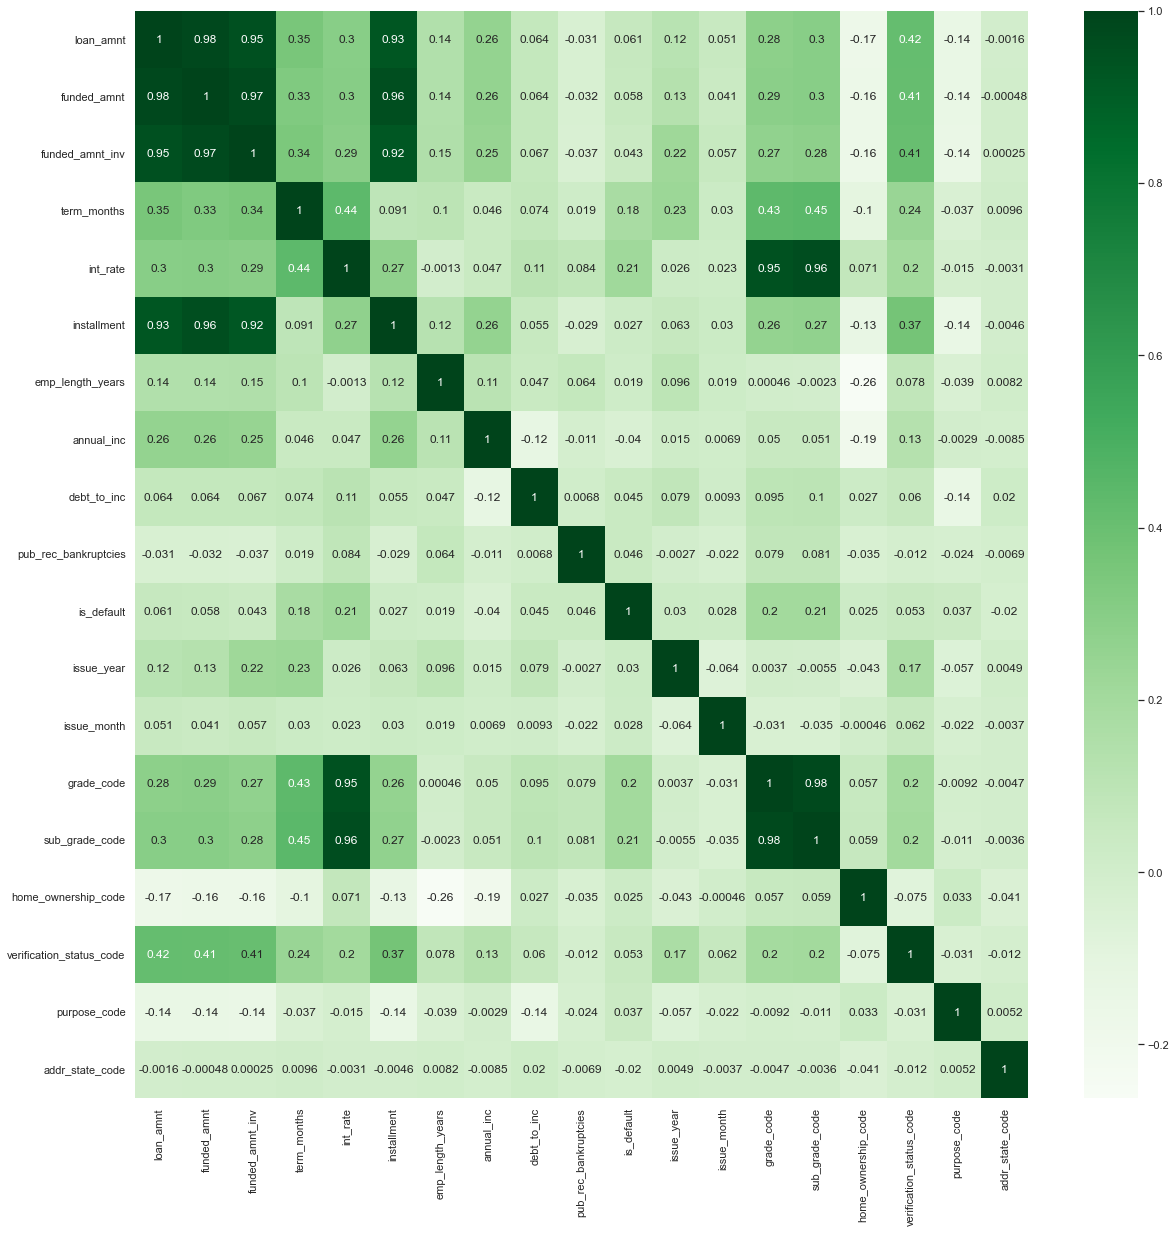

In [35]:
plt.figure(figsize = [20, 20])
sns.heatmap(data = corrdf.corr(), cmap = 'Greens', annot = True)
plt.show()

Based on the heatmap following are the main observations:

- **Loan status** is positively correlated to following variables in descending order:

    1. Interest Rate
    2. Sub Grade
    3. Grade
    4. Term Months
    5. Loan Amount
    6. Verification Status
    
    **Loan Status** also has strong negative correlation with following variables:
    1. Annual Income, as the Annual income decreases there is more chance that the loan will be defaulted
    2. State Code


- **Loan Amount** has strong correlation to **Installment**
- **Term Months** has strong correlation to **Sub Grade**
- **Interest Rate** has strong correlation to **Sub Grade**


## Univariate Analysis


#### Loan Amount

From below plots we can observe that maximum loan application are for **5000** to **10000** amount.

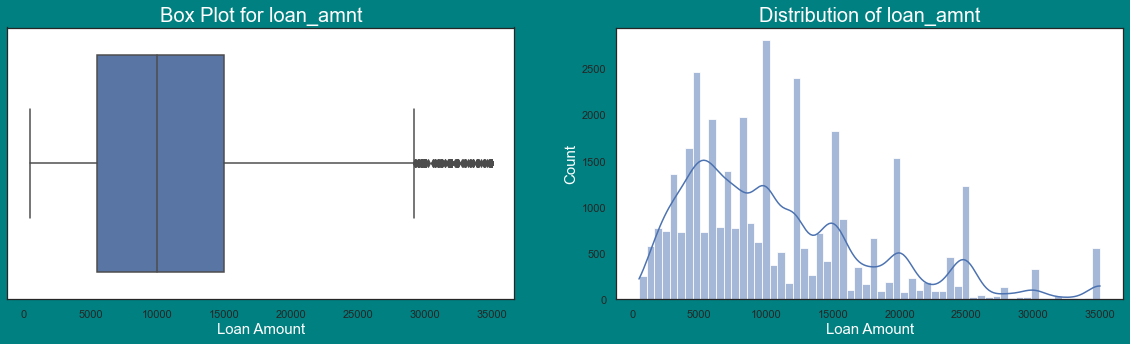

In [231]:
fig, axes = plt.subplots(1, 2, figsize = [20, 5], facecolor= 'teal')

sns.boxplot(ax = axes[0], data = df, x = 'loan_amnt')
axes[0].set_title('Box Plot for loan_amnt', fontsize = 20, color = 'w')
axes[0].set_xlabel('Loan Amount', fontsize = 15, color = 'w')

sns.histplot(ax = axes[1], data = df, x = 'loan_amnt', kde = True)
axes[1].set_title('Distribution of loan_amnt', fontsize = 20, color = 'w')
axes[1].set_xlabel('Loan Amount', fontsize = 15, color = 'w')
axes[1].set_ylabel('Count', fontsize = 15, color = 'w')

plt.show()

In [208]:
df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 40000])

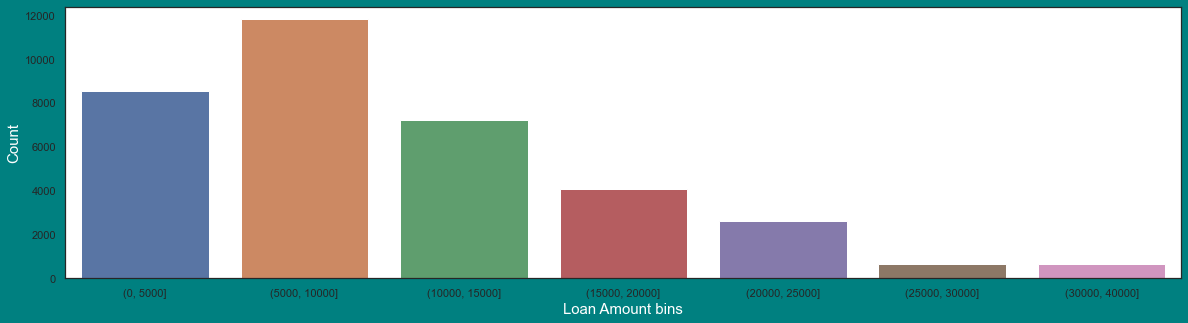

In [236]:
plt.figure(figsize = [20, 5], facecolor = 'teal')
fig = sns.countplot(data = df, x = 'loan_amnt_bins')
fig.set_xlabel('Loan Amount bins', fontsize = 15, color = 'w')
fig.set_ylabel('Count', fontsize = 15, color = 'w')
plt.show()

#### Term in Months

Observation: Maximum loan applications for 36 months term.

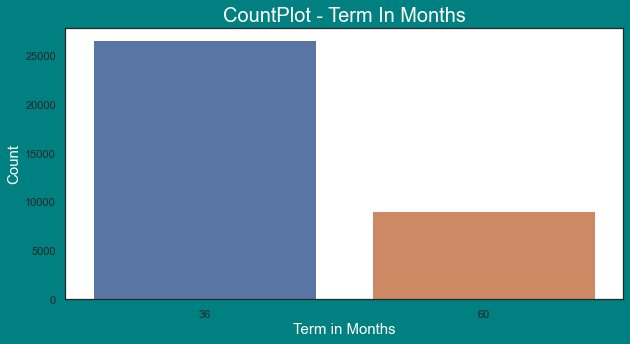

In [251]:
plt.figure(figsize = [10, 5], facecolor = 'teal')
fig = sns.countplot(data = df, x = "term_months")
fig.set_title('CountPlot - Term In Months', fontsize = 20, color = 'w')
fig.set_xlabel('Term in Months', fontsize = 15, color = 'w')
fig.set_ylabel('Count', fontsize = 15, color = 'w')
plt.show()

#### Grade and Sub Grade

Grade is a Ordered categorical variable and most of the loan applications are grade A, B and C and B being the highest.

Each grade is further divided into sub-grades. A3, A4, B3, B5 has the highest number of loan applications.

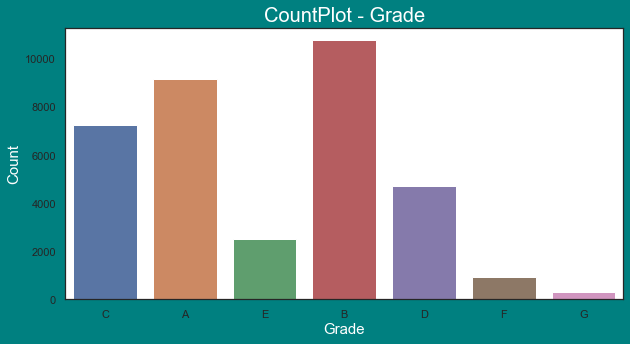

In [252]:
plt.figure(figsize = [10, 5], facecolor = 'teal')
fig = sns.countplot(data = df, x = "grade")
fig.set_title('CountPlot - Grade', fontsize = 20, color = 'w')
fig.set_xlabel('Grade', fontsize = 15, color = 'w')
fig.set_ylabel('Count', fontsize = 15, color = 'w')
plt.show()

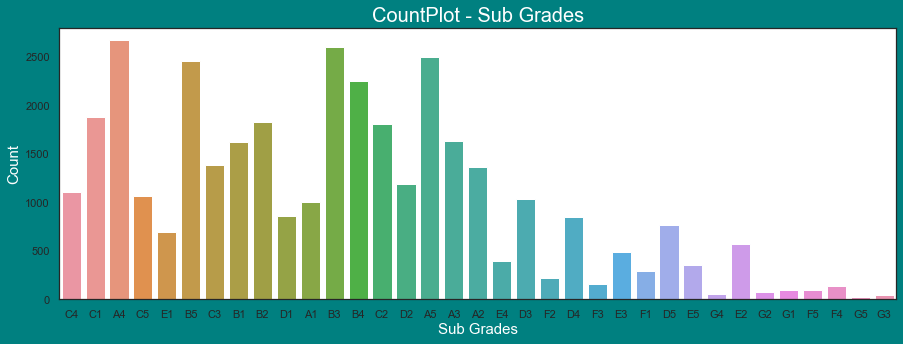

In [254]:
plt.figure(figsize = [15, 5], facecolor = 'teal')
fig = sns.countplot(data = df, x = "sub_grade")
fig.set_title('CountPlot - Sub Grades', fontsize = 20, color = 'w')
fig.set_xlabel('Sub Grades', fontsize = 15, color = 'w')
fig.set_ylabel('Count', fontsize = 15, color = 'w')
plt.show()

#### Interest Rate

Observation - Maximum loan applications have interest rate in range 9 to 15. With median at 11.86%

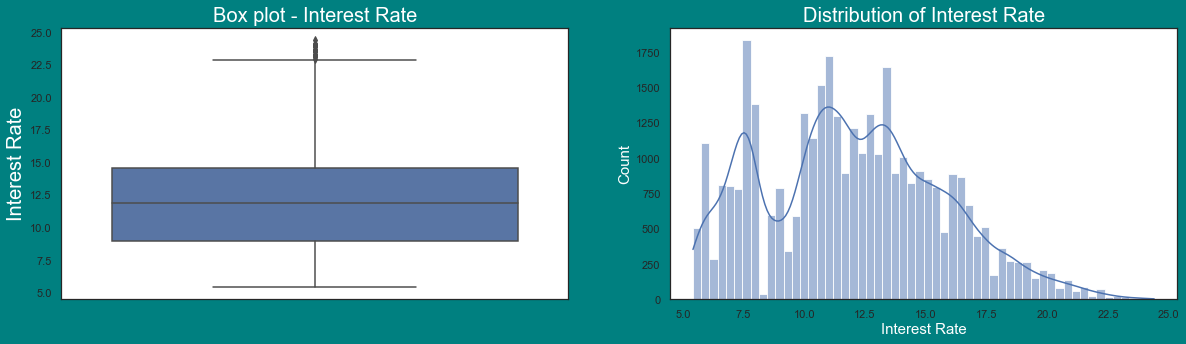

In [275]:
fig, axes = plt.subplots(1, 2, figsize = [20, 5], facecolor = 'teal')

sns.boxplot(ax = axes[0], data = df, y = "int_rate")
axes[0].set_title('Box plot - Interest Rate', fontsize = 20, color = 'w')
axes[0].set_ylabel('Interest Rate', fontsize = 20, color = 'w')

sns.histplot(ax = axes[1], data = df, x = "int_rate", kde = True)
axes[1].set_title('Distribution of Interest Rate', fontsize = 20, color = 'w')
axes[1].set_xlabel('Interest Rate', fontsize = 15, color = 'w')
axes[1].set_ylabel('Count', fontsize = 15, color = 'w')

plt.show()

In [261]:
df['int_rate_bins'] = pd.cut(df['int_rate'], [0, 5, 10, 15, 20, 25])

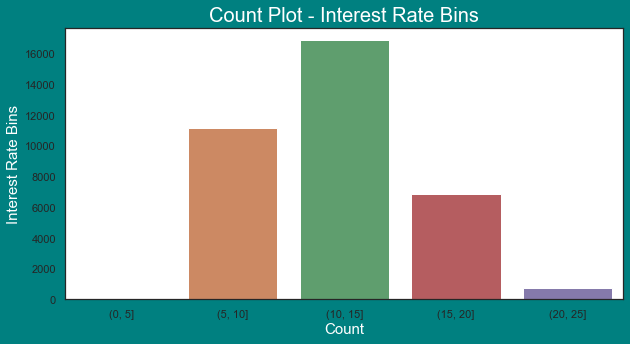

In [264]:
plt.figure(figsize = [10, 5], facecolor = 'teal')
fig = sns.countplot(data = df, x = 'int_rate_bins')
fig.set_title('Count Plot - Interest Rate Bins', fontsize = 20, color = 'w')
fig.set_ylabel('Interest Rate Bins', fontsize = 15, color = 'w')
fig.set_xlabel('Count', fontsize = 15, color = 'w')
plt.show()

#### Installments

Maximum loan applications have installments in the range 200 - 400.

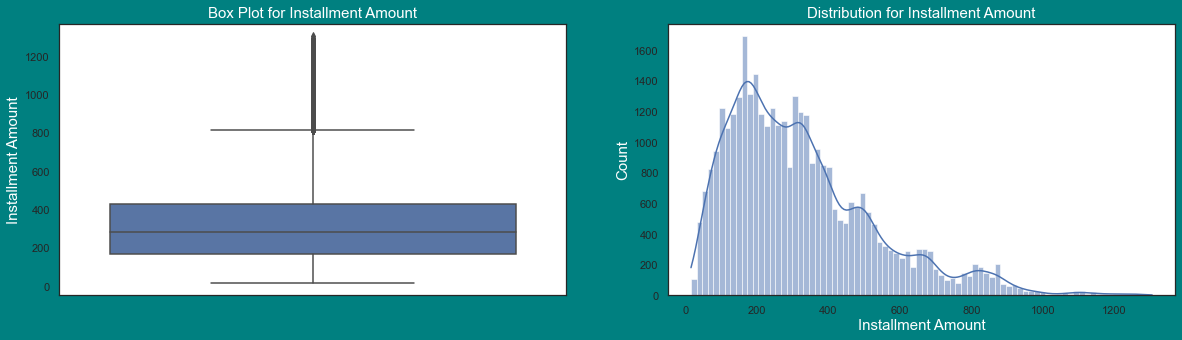

In [284]:
fig, axes = plt.subplots(1, 2, figsize = [20, 5], facecolor = 'teal')

sns.boxplot(ax = axes[0], data = df, y = 'installment')
axes[0].set_title('Box Plot for Installment Amount', fontsize = 15, color = 'w')
axes[0].set_ylabel('Installment Amount', fontsize = 15, color = 'w')

sns.histplot(ax = axes[1], data = df, x = 'installment', kde = True)
axes[1].set_title('Distribution for Installment Amount', fontsize = 15, color = 'w')
axes[1].set_xlabel('Installment Amount', fontsize = 15, color = 'w')
axes[1].set_ylabel('Count', fontsize = 15, color = 'w')

plt.show()

#### Employment Length in Years

Maximum loan applicants have 10+ years of Employment length

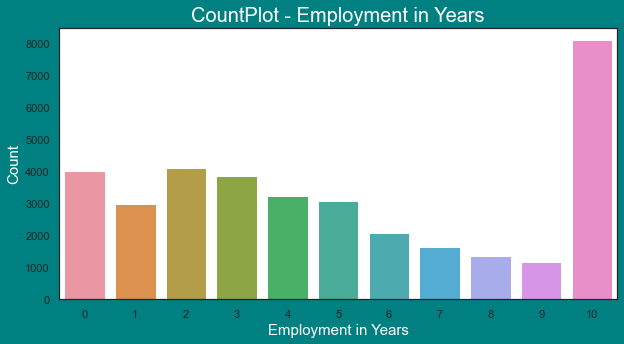

In [278]:
plt.figure(figsize = [10, 5], facecolor = 'teal')
fig = sns.countplot(data = df, x = 'emp_length_years')
fig.set_title('CountPlot - Employment in Years', fontsize = 20, color = 'w')
fig.set_xlabel('Employment in Years', fontsize = 15, color = 'w')
fig.set_ylabel('Count', fontsize = 15, color = 'w')
plt.show()

#### Home Ownership

Maximum Loan applications have **rented** home followed by **mortgaged**.

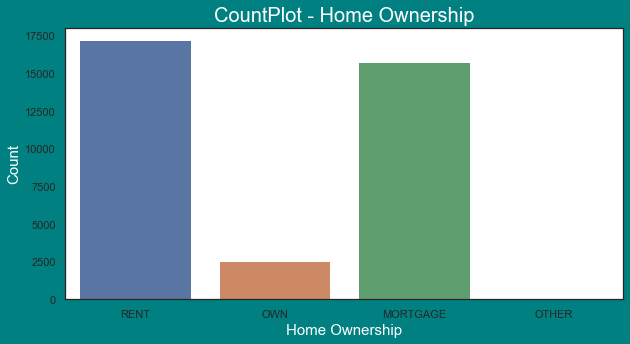

In [285]:
plt.figure(figsize = [10, 5], facecolor = 'teal')

fig = sns.countplot(data = df, x = 'home_ownership')
fig.set_title('CountPlot - Home Ownership', fontsize = 20, color = 'w')
fig.set_xlabel('Home Ownership', fontsize = 15, color = 'w')
fig.set_ylabel('Count', fontsize = 15, color = 'w')

plt.show()

#### Verification Status

Maximum applicant's Income is not verified

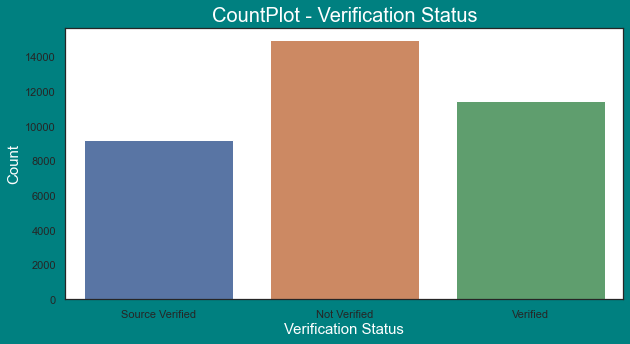

In [286]:
plt.figure(figsize = [10, 5], facecolor = 'teal')

fig = sns.countplot(data = df, x= 'verification_status')

fig.set_title('CountPlot - Verification Status', fontsize = 20, color = 'w')
fig.set_xlabel('Verification Status', fontsize = 15, color = 'w')
fig.set_ylabel('Count', fontsize = 15, color = 'w')

plt.show()

#### Loan Purpose

Following are the top 4 Purpose for loan applications:

1. Debt Consolidation
2. Credit Card
3. Other
4. Home Improvement
5. Major Purpose

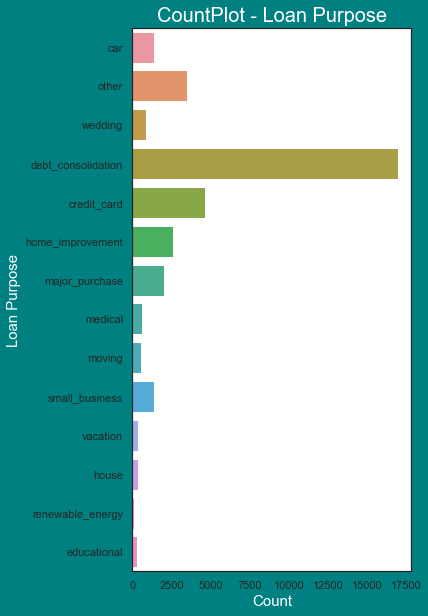

In [288]:
plt.figure(figsize = [5, 10], facecolor = 'teal')
fig = sns.countplot(data = df, y = 'purpose')


fig.set_title('CountPlot - Loan Purpose', fontsize = 20, color = 'w')
fig.set_ylabel('Loan Purpose', fontsize = 15, color = 'w')
fig.set_xlabel('Count', fontsize = 15, color = 'w')

plt.show()

#### Address State

Following are top 5 States for Loan applications:

1. CA
2. NY
3. FL
4. TX
5. NJ

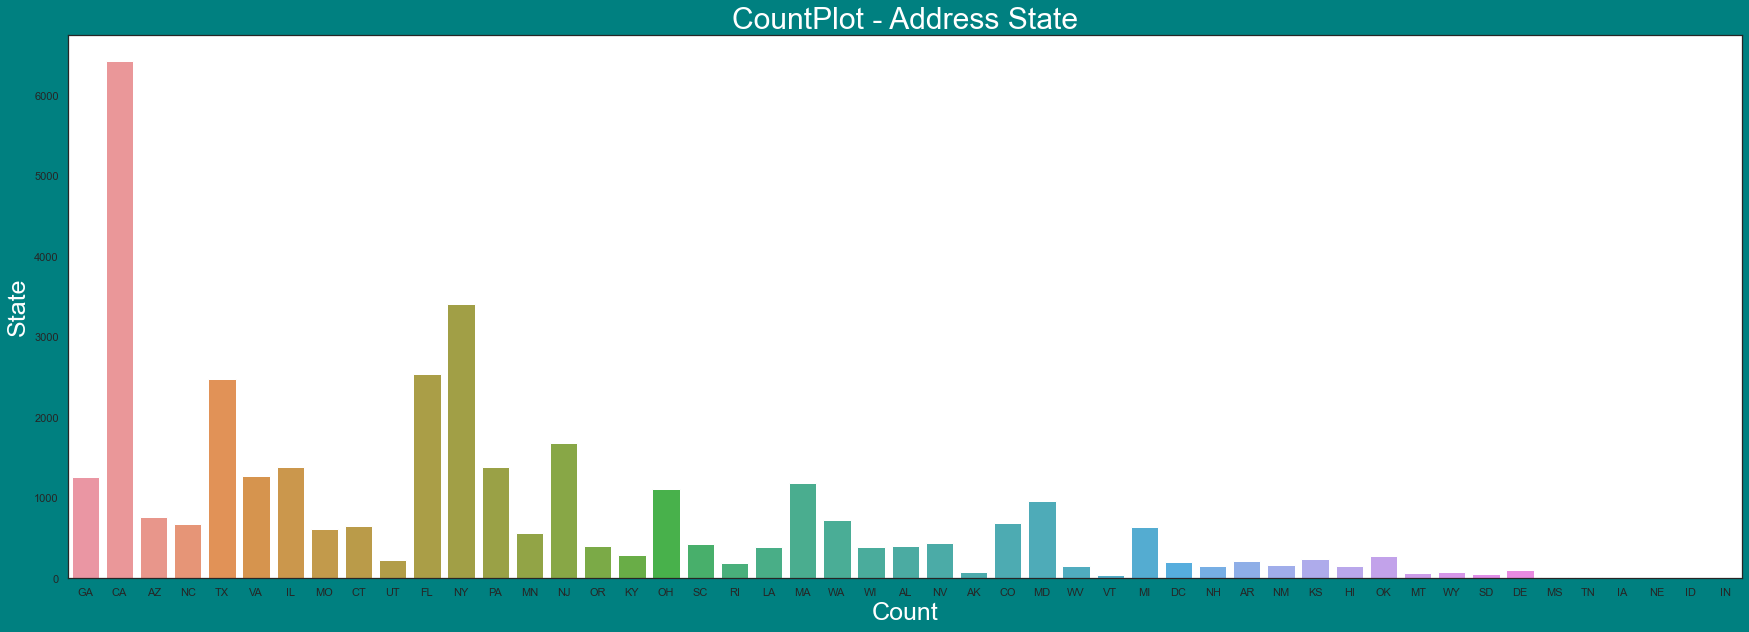

In [293]:
plt.figure(figsize = [30, 10], facecolor = 'teal')

fig = sns.countplot(data = df, x = 'addr_state')

fig.set_title('CountPlot - Address State', fontsize = 30, color = 'w')
fig.set_ylabel('State', fontsize = 25, color = 'w')
fig.set_xlabel('Count', fontsize = 25, color = 'w')

plt.show()

#### Annual Income

Annual Income has outliers with very high incomes, maximum being 6000000. 75% of the population have Income less than or equal to **82150**. Maximum number of applicants have annual income in the range **40000** - **60000**.


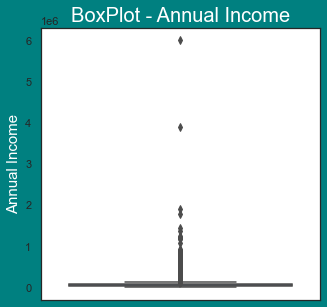

In [306]:
plt.figure(figsize = [5, 5], facecolor = 'teal')

fig = sns.boxplot(data = df, y = 'annual_inc')

fig.set_title('BoxPlot - Annual Income', fontsize = 20, color = 'w')
fig.set_ylabel('Annual Income', fontsize = 15, color = 'w')
plt.show()

In [294]:
df['annual_inc'].describe()

count     35537.00000
mean      68986.80543
std       63892.00494
min        4000.00000
25%       41124.00000
50%       60000.00000
75%       82150.00000
max     6000000.00000
Name: annual_inc, dtype: float64

Find out the upper fence using formula

Q3 + 1.5 * IQR

Filter all the incomes above this value and plot the remaining data

In [51]:
### Find the upper fence using Q3 + 1.5 * IQR
q1 = 41124
q3 = 82150
iqr = (q3 - q1)
upper_fence = q3 + 1.5 * iqr
upper_fence

143689.0

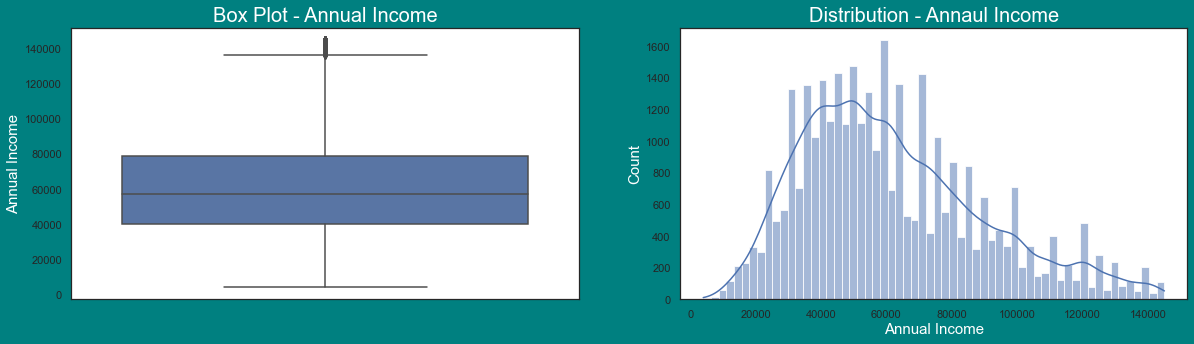

In [298]:
fig, axes = plt.subplots(1, 2, figsize = [20, 5], facecolor = 'teal')

sns.boxplot(ax = axes[0], data = df[df['annual_inc'] <= 145000], y = 'annual_inc')
axes[0].set_title('Box Plot - Annual Income', fontsize = 20, color = 'w')
axes[0].set_ylabel('Annual Income', fontsize = 15, color = 'w')

sns.histplot(ax = axes[1], data = df[df['annual_inc'] <= 145000], x = 'annual_inc', kde = True)
axes[1].set_title('Distribution - Annaul Income', fontsize = 20, color = 'w')
axes[1].set_xlabel('Annual Income', fontsize = 15, color = 'w')
axes[1].set_ylabel('Count', fontsize = 15, color = 'w')

plt.show()

In [299]:
### Create Bins for annual_inc
df['annual_inc_bins'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000, 100000, 6000000])

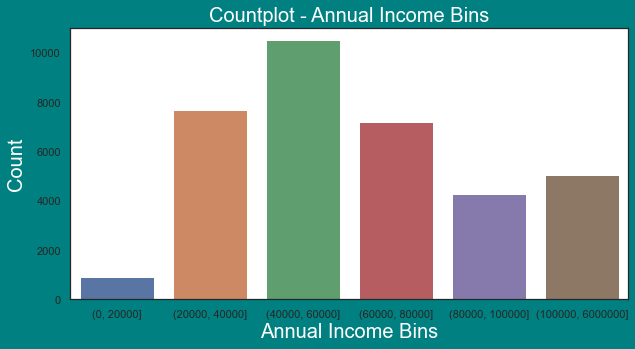

In [300]:
plt.figure(figsize = [10, 5], facecolor = 'teal')

fig = sns.countplot(data = df, x = 'annual_inc_bins')
fig.set_title('Countplot - Annual Income Bins', fontsize = 20, color = 'w')
fig.set_xlabel('Annual Income Bins', fontsize = 20, color = 'w')
fig.set_ylabel('Count', fontsize = 20, color = 'w')

plt.show()

#### Debt to Income

Maximum applicants have debt to income in the range 8.3 to 18.64 with  maximum 10 - 15.

In [307]:
df['debt_to_inc'].describe()

count   35537.00000
mean       13.39515
std         6.64022
min         0.00000
25%         8.31000
50%        13.50000
75%        18.64000
max        29.99000
Name: debt_to_inc, dtype: float64

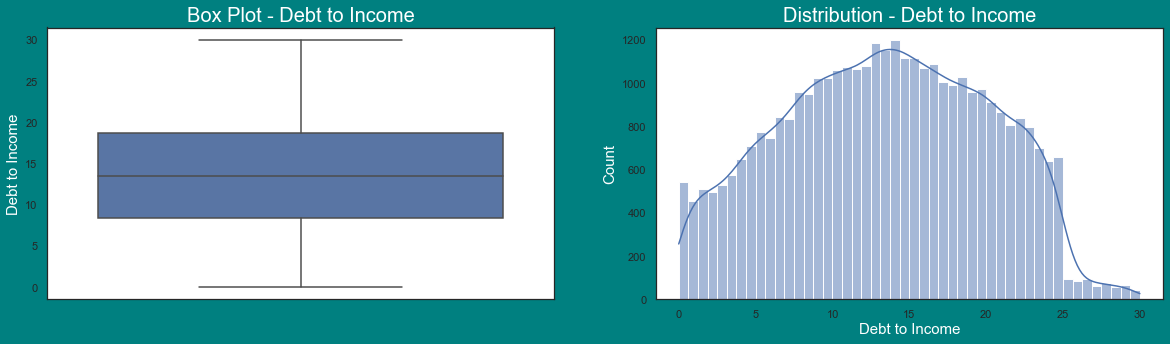

In [308]:
fig, axes = plt.subplots(1, 2, figsize = [20, 5], facecolor = 'teal')

sns.boxplot(ax = axes[0], data = df, y = 'debt_to_inc')
axes[0].set_title('Box Plot - Debt to Income', fontsize = 20, color = 'w')
axes[0].set_ylabel('Debt to Income', fontsize = 15, color = 'w')

sns.histplot(ax = axes[1], data = df, x = 'debt_to_inc',kde = True)
axes[1].set_title('Distribution - Debt to Income', fontsize = 20, color = 'w')
axes[1].set_xlabel('Debt to Income', fontsize = 15, color = 'w')
axes[1].set_ylabel('Count', fontsize = 15, color = 'w')

plt.show()

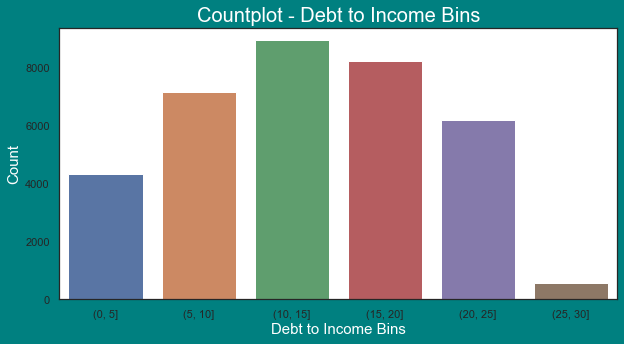

In [309]:
df['debt_to_inc_bins'] = pd.cut(df['debt_to_inc'], [0,5,10,15,20,25,30])

plt.figure(figsize = [10, 5], facecolor = 'teal')

fig = sns.countplot(data = df, x = 'debt_to_inc_bins')
fig.set_title('Countplot - Debt to Income Bins', fontsize = 20, color = 'w')
fig.set_xlabel('Debt to Income Bins', fontsize = 15, color = 'w')
fig.set_ylabel('Count', fontsize = 15, color = 'w')

plt.show()

#### Loan Issue Year and Month

Maximum number of loans were applied in year 2011. If we look at months, December has the maximum number of loan applications followed by November.

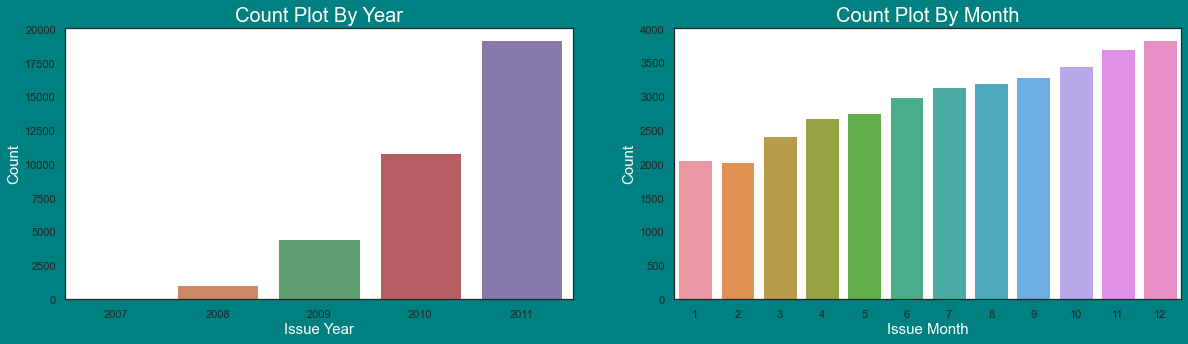

In [320]:

fig, axes = plt.subplots(1, 2, figsize = [20, 5], facecolor = 'teal')

sns.countplot(ax = axes[0], data = df, x = 'issue_year')
axes[0].set_title('Count Plot By Year', fontsize = 20, color = 'w')
axes[0].set_ylabel('Count', fontsize = 15, color = 'w')
axes[0].set_xlabel('Issue Year', fontsize = 15, color = 'w')

sns.countplot(ax = axes[1], data = df, x = 'issue_month')
axes[1].set_title('Count Plot By Month', fontsize = 20, color = 'w')
axes[1].set_ylabel('Count', fontsize = 15, color = 'w')
axes[1].set_xlabel('Issue Month', fontsize = 15, color = 'w')

plt.show()

#### Loan Status


Maximum number of loans have been fully paid.

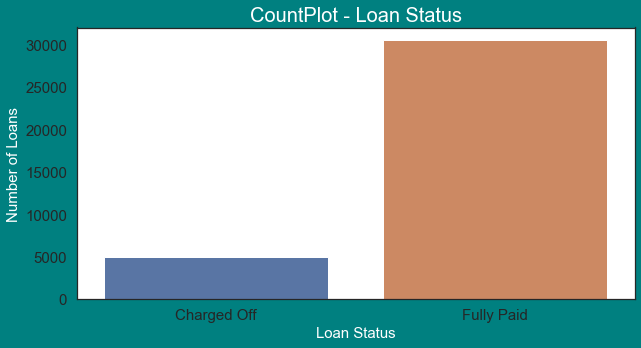

In [318]:
plt.figure(figsize = [10, 5], facecolor = 'teal')

fig = sns.countplot(data = df, x = 'loan_status')
fig.set_title('CountPlot - Loan Status', fontsize = 20, color = 'w')
fig.set_xlabel('Loan Status', fontsize = 15, color = 'w')
fig.set_ylabel('Number of Loans', fontsize = 15, color = 'w')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Bivariate Analysis

#### Loan Amount vs Annual Income

We can see from the plot below, the Loam amount approved increases with the Annual Income.

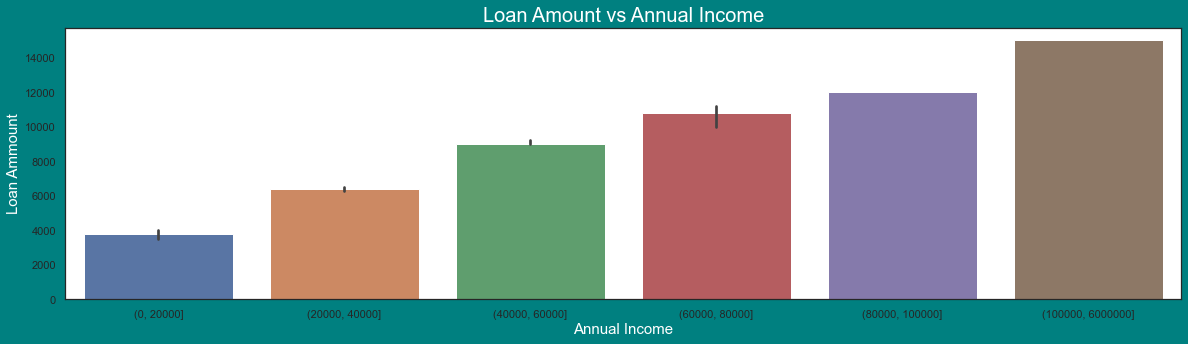

In [322]:
plt.figure(figsize = [20, 5], facecolor = 'teal')

fig = sns.barplot(data = df, x = 'annual_inc_bins', y = 'loan_amnt', estimator = np.median)
fig.set_title('Loan Amount vs Annual Income', fontsize = 20, color = 'w')
fig.set_xlabel('Annual Income', fontsize = 15, color = 'w')
fig.set_ylabel('Loan Ammount', fontsize = 15, color = 'w')

plt.show()

#### Grade vs Loan Amount

As the grade increases from A -> G, the Loan amount also increases.

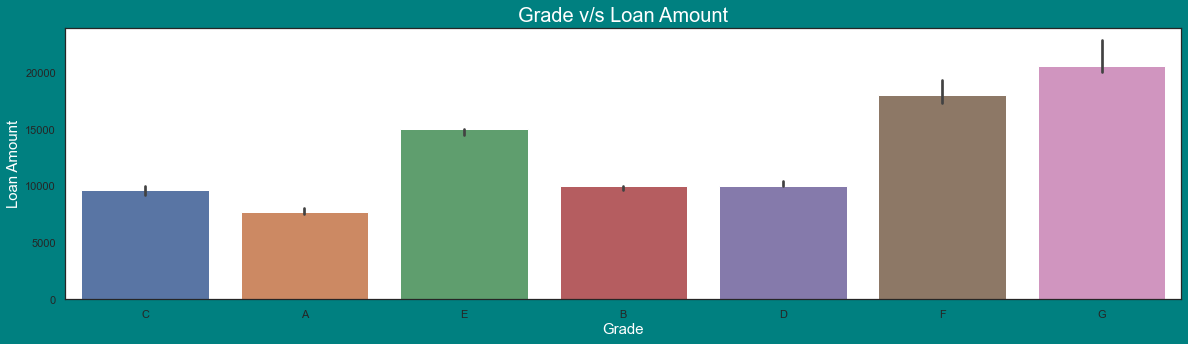

In [324]:
plt.figure(figsize = [20, 5], facecolor ='teal')

fig = sns.barplot(data = df, x = 'grade', y = 'loan_amnt', estimator = np.median)
fig.set_title('Grade v/s Loan Amount', fontsize = 20, color = 'w')
fig.set_xlabel('Grade', fontsize = 15, color = 'w')
fig.set_ylabel('Loan Amount', fontsize = 15, color = 'w')

plt.show()

#### Employment length in Years vs Loan Amount

Loan amount increase with employment length.

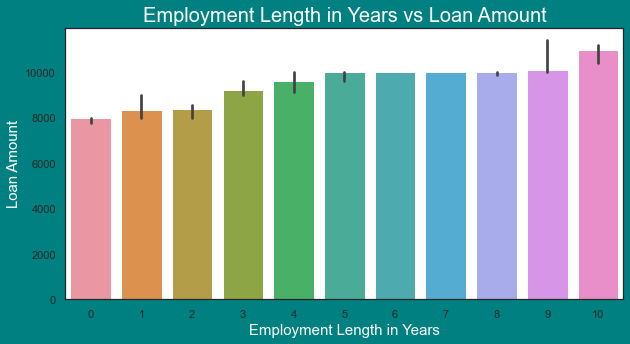

In [326]:
plt.figure(figsize = [10, 5], facecolor = 'teal')

fig = sns.barplot(data = df, x = 'emp_length_years', y = 'loan_amnt', estimator = np.median)
fig.set_title('Employment Length in Years vs Loan Amount', fontsize = 20, color = 'w')
fig.set_xlabel('Employment Length in Years', fontsize = 15, color = 'w')
fig.set_ylabel('Loan Amount', fontsize = 15, color = 'w')

plt.show()

#### Sub Grade vs Loan Amount

Loan amount increases as the Sub Grade changes from A1 - G5.

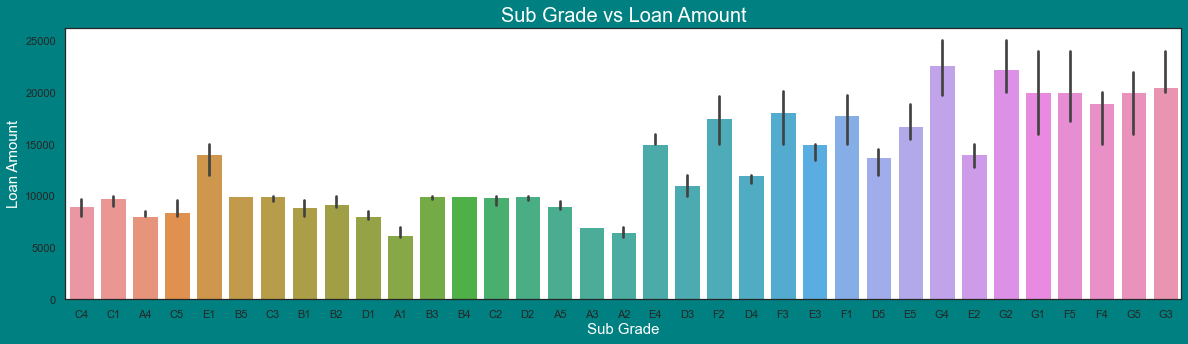

In [329]:
plt.figure(figsize = [20, 5], facecolor = 'teal')

fig = sns.barplot(data = df, x = 'sub_grade', y = 'loan_amnt', estimator = np.median)
fig.set_title('Sub Grade vs Loan Amount', fontsize = 20, color = 'w')
fig.set_xlabel('Sub Grade', fontsize = 15, color = 'w')
fig.set_ylabel('Loan Amount', fontsize = 15, color = 'w')

plt.show()

#### Grade vs Interest Rate

Interest rate is higher for Loan applications with grade E,F and G and lowest for grade A.

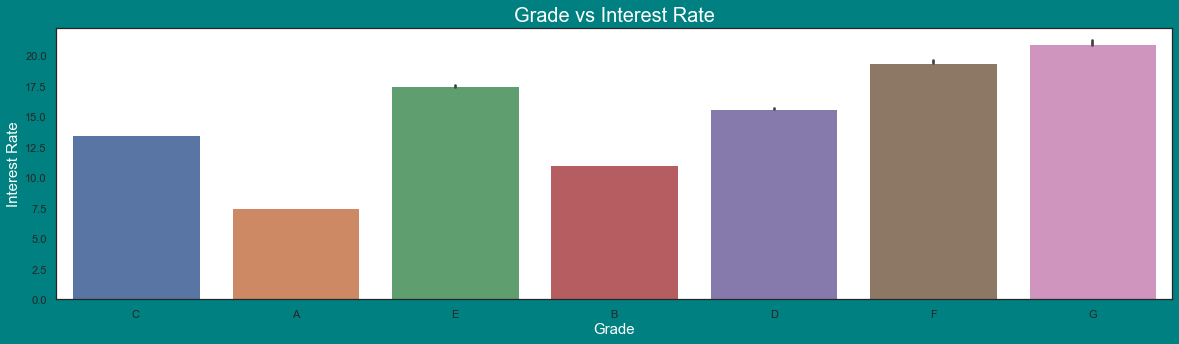

In [330]:
plt.figure(figsize = [20, 5], facecolor = 'teal')

fig = sns.barplot(data = df, x = 'grade', y = 'int_rate', estimator = np.median)
fig.set_title('Grade vs Interest Rate', fontsize = 20, color = 'w')
fig.set_xlabel('Grade', fontsize = 15, color = 'w')
fig.set_ylabel('Interest Rate', fontsize = 15, color = 'w')
plt.show()

### Stacked Percentage Bar Plots

#### Interest Rate and Loan Status

Based on the plot below we can observe that as the Interest range increases the percentage of loan that are defaulted also increases. Highest is at 20-25 range, with 38% loan applications defaulted

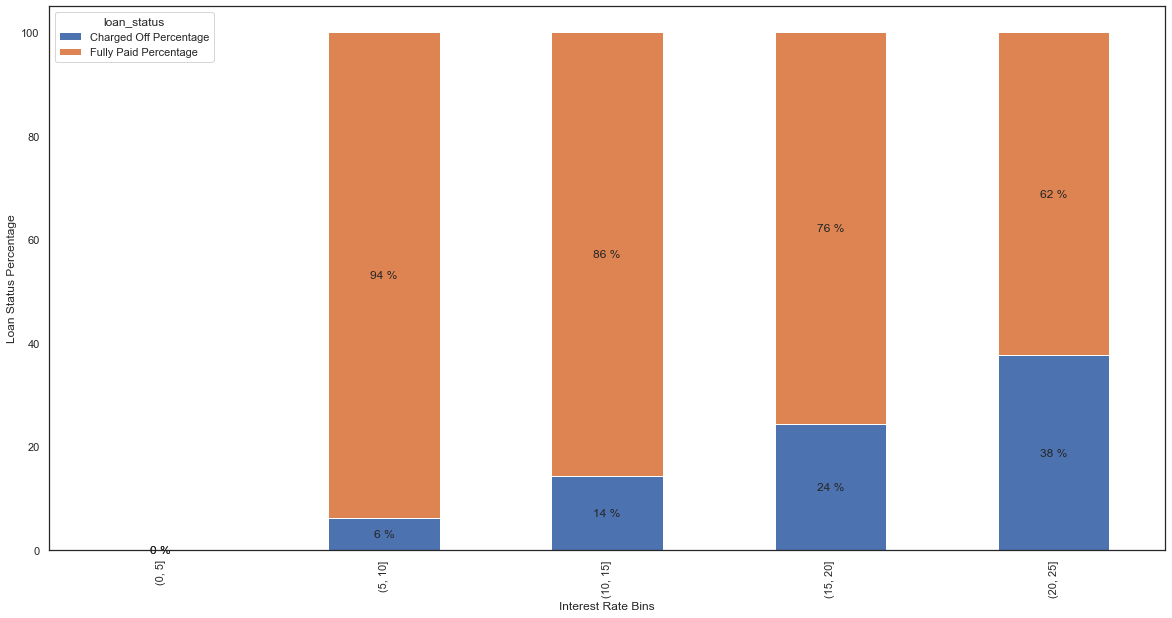

In [337]:

int_rate_loan_status = df.groupby(['int_rate_bins', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'int_rate_bins', values = 0)
int_rate_loan_status['Charged Off Percentage'] = (int_rate_loan_status['Charged Off'] / (int_rate_loan_status['Charged Off'] + int_rate_loan_status['Fully Paid'])) * 100
int_rate_loan_status['Fully Paid Percentage'] = (int_rate_loan_status['Fully Paid'] / (int_rate_loan_status['Charged Off'] + int_rate_loan_status['Fully Paid'])) * 100

int_rate_loan_status.drop(columns = ['Charged Off', 'Fully Paid'], inplace = True)

ax = int_rate_loan_status.plot(kind = 'bar', stacked = True, \
                               figsize = [20, 10], \
                               xlabel = 'Interest Rate Bins', ylabel = 'Loan Status Percentage')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    
plt.show()

#### Loan Amount and Loan Status

Based on the plot below, we can observe that the percentage of loan that are defaulted increase with Loan amount. 24% of the loans are defaulted in Loan amount > 30K.

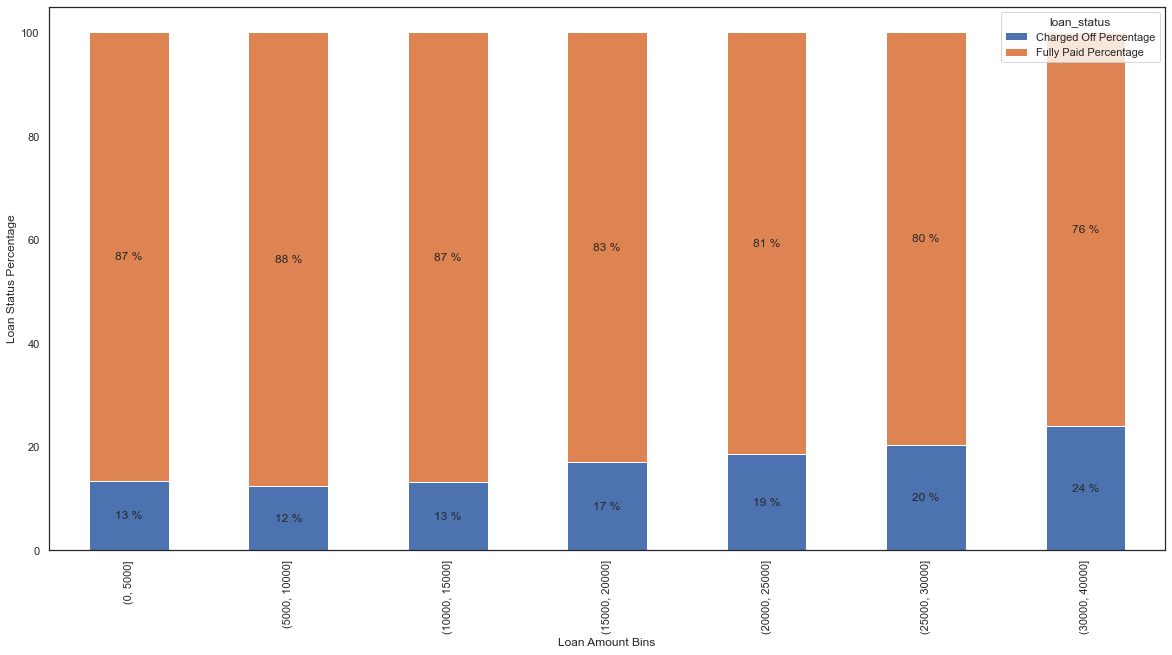

In [338]:
loan_amnt_defaulted = df.groupby(['loan_amnt_bins', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'loan_amnt_bins', values = 0)
loan_amnt_defaulted['Charged Off Percentage'] = (loan_amnt_defaulted['Charged Off'] / (loan_amnt_defaulted['Charged Off'] + loan_amnt_defaulted['Fully Paid'])) * 100
loan_amnt_defaulted['Fully Paid Percentage'] = (loan_amnt_defaulted['Fully Paid'] / (loan_amnt_defaulted['Charged Off'] + loan_amnt_defaulted['Fully Paid'])) * 100

loan_amnt_defaulted.drop(columns = ['Charged Off', 'Fully Paid'], inplace = True)

ax = loan_amnt_defaulted.plot(kind = 'bar', stacked = True, figsize = [20, 10], xlabel = 'Loan Amount Bins', ylabel = 'Loan Status Percentage')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    
plt.show()

#### Grade and Loan Status

Loan defaulted increases with Grade. Maximum being with grades E, F and G. 34% percent of the Grade G loans get defaulted.

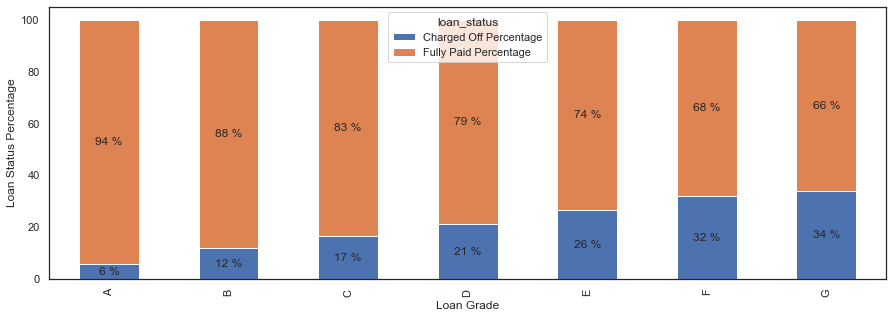

In [198]:
grade_defaulted = df.groupby(['grade', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'grade', values = 0)
grade_defaulted['Charged Off Percentage'] = (grade_defaulted['Charged Off'] / (grade_defaulted['Charged Off'] + grade_defaulted['Fully Paid'])) * 100
grade_defaulted['Fully Paid Percentage'] = (grade_defaulted['Fully Paid'] / (grade_defaulted['Charged Off'] + grade_defaulted['Fully Paid'])) * 100

grade_defaulted.drop(columns = ['Charged Off', 'Fully Paid'], inplace = True)

ax = grade_defaulted.plot(kind = 'bar', stacked = True, figsize = [15, 5], xlabel = 'Loan Grade', ylabel = 'Loan Status Percentage')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.show()


#### Term Months and Loan Status

Loans with higher terms have more chances of getting defaulted. 25% of loans with 60 month term gets defaulted compared to 11% for 36 month term.

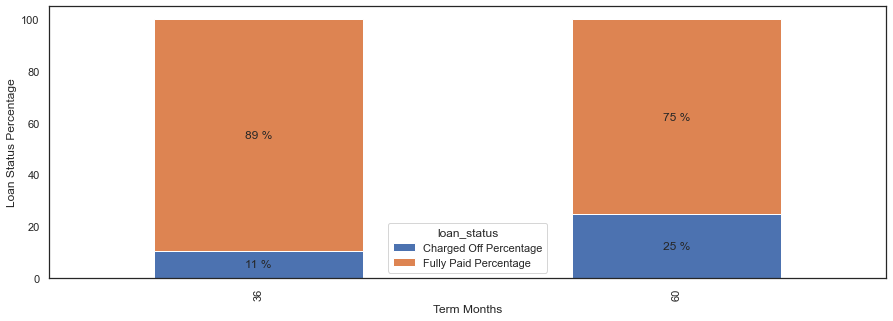

In [202]:
term_months_defaulted = df.groupby(['term_months', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'term_months', values = 0)
term_months_defaulted['Charged Off Percentage'] = (term_months_defaulted['Charged Off'] / (term_months_defaulted['Charged Off'] + term_months_defaulted['Fully Paid'])) * 100
term_months_defaulted['Fully Paid Percentage'] = (term_months_defaulted['Fully Paid'] / (term_months_defaulted['Charged Off'] + term_months_defaulted['Fully Paid'])) * 100

term_months_defaulted.drop(columns = ['Charged Off', 'Fully Paid'], inplace = True)

ax = term_months_defaulted.plot(kind = 'bar', stacked = True, figsize = [15, 5], xlabel = 'Term Months', ylabel = 'Loan Status Percentage')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.show()

#### Annual Income and Loan Status

Based on the plot below, we can observe that as the annual income reduces the chances of loan getting defaulted also increases. Almost 19% of the loans get defaulted for annual income below 20K.

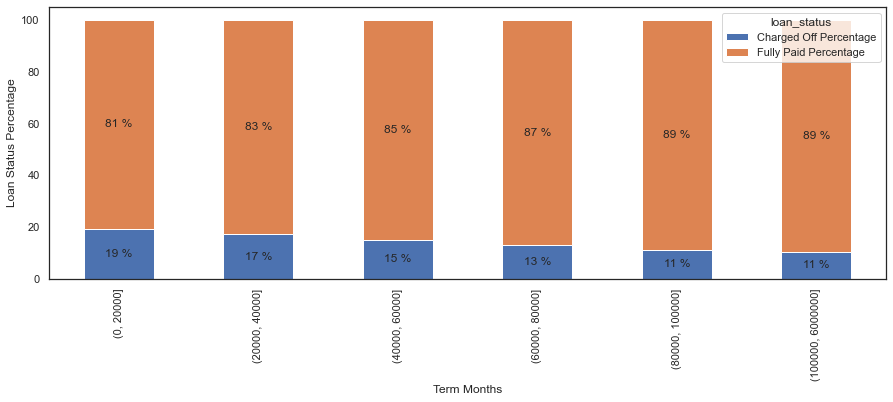

In [204]:
annual_inc_defaulted = df.groupby(['annual_inc_bins', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'annual_inc_bins', values = 0)
annual_inc_defaulted['Charged Off Percentage'] = (annual_inc_defaulted['Charged Off'] / (annual_inc_defaulted['Charged Off'] + annual_inc_defaulted['Fully Paid'])) * 100
annual_inc_defaulted['Fully Paid Percentage'] = (annual_inc_defaulted['Fully Paid'] / (annual_inc_defaulted['Charged Off'] + annual_inc_defaulted['Fully Paid'])) * 100

annual_inc_defaulted.drop(columns = ['Charged Off', 'Fully Paid'], inplace = True)

ax = annual_inc_defaulted.plot(kind = 'bar', stacked = True, figsize = [15, 5], xlabel = 'Term Months', ylabel = 'Loan Status Percentage')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.show()

#### Debt To income and Loan Status

Based on the plot below, we can observe that Debt to income does not have much impact on the loans getting defaulted.

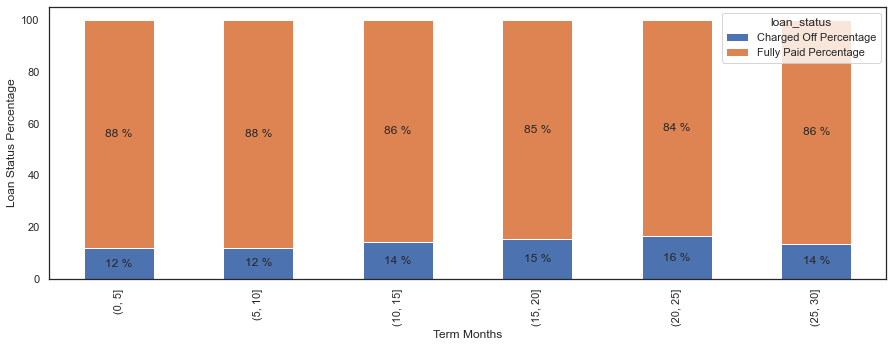

In [206]:
dti_defaulted = df.groupby(['debt_to_inc_bins', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'debt_to_inc_bins', values = 0)
dti_defaulted['Charged Off Percentage'] = (dti_defaulted['Charged Off'] / (dti_defaulted['Charged Off'] + dti_defaulted['Fully Paid'])) * 100
dti_defaulted['Fully Paid Percentage'] = (dti_defaulted['Fully Paid'] / (dti_defaulted['Charged Off'] + dti_defaulted['Fully Paid'])) * 100

dti_defaulted.drop(columns = ['Charged Off', 'Fully Paid'], inplace = True)

ax = dti_defaulted.plot(kind = 'bar', stacked = True, figsize = [15, 5], xlabel = 'Term Months', ylabel = 'Loan Status Percentage')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.show()

#### State and Loan Status

From below plot, we can observe loan applications from state NV, TN, AK have more defaulted loans. 

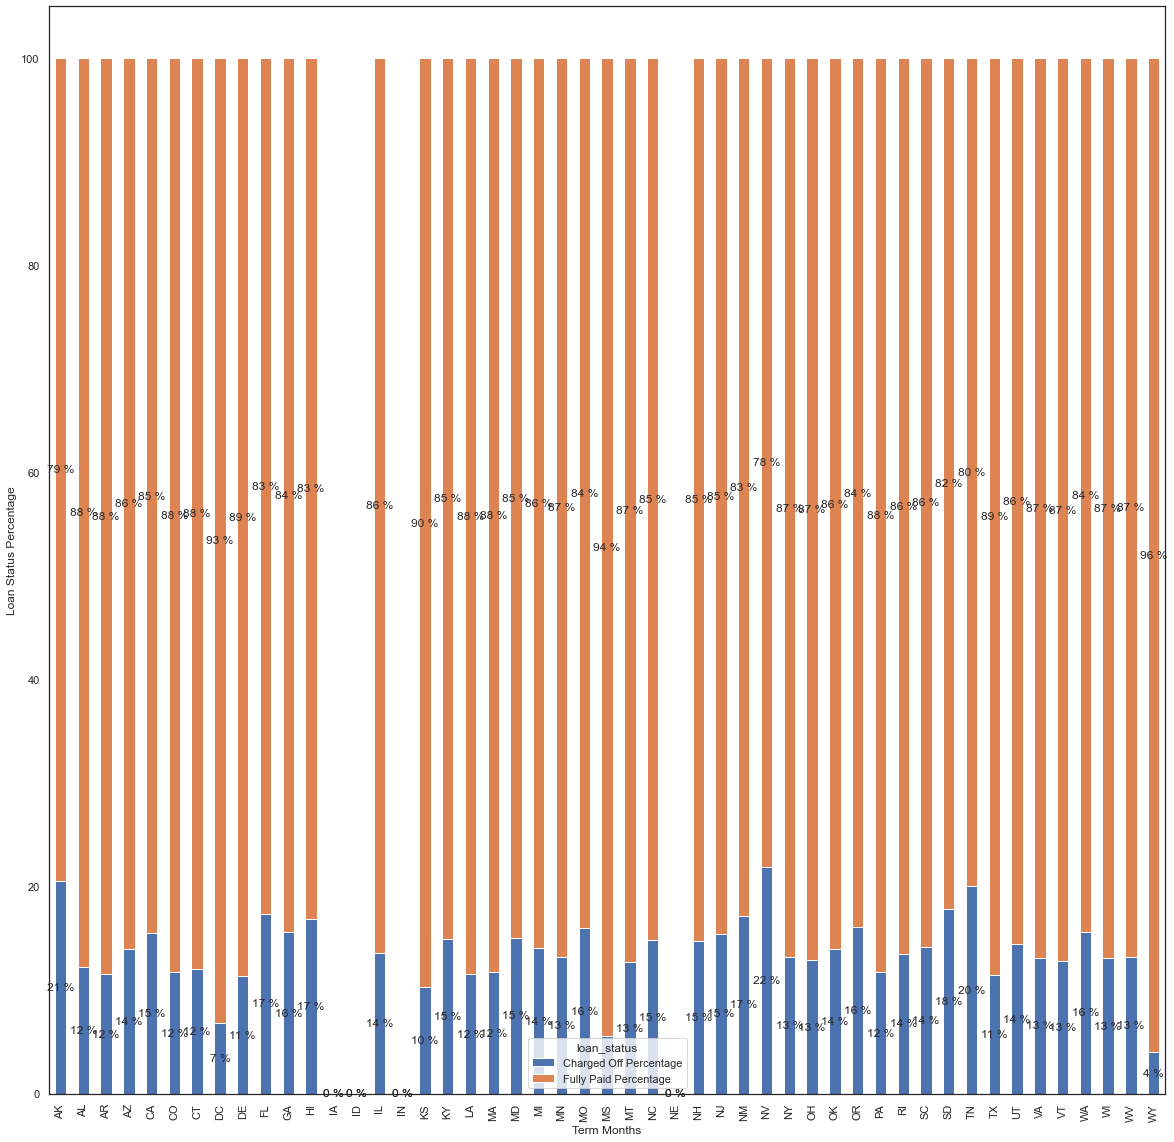

In [343]:
state_defaulted = df.groupby(['addr_state', 'loan_status']).size().reset_index().pivot(columns = 'loan_status', index = 'addr_state', values = 0)
state_defaulted['Charged Off Percentage'] = (state_defaulted['Charged Off'] / (state_defaulted['Charged Off'] + state_defaulted['Fully Paid'])) * 100
state_defaulted['Fully Paid Percentage'] = (state_defaulted['Fully Paid'] / (state_defaulted['Charged Off'] + state_defaulted['Fully Paid'])) * 100

state_defaulted.drop(columns = ['Charged Off', 'Fully Paid'], inplace = True)

ax = state_defaulted.plot(kind = 'bar', stacked = True, figsize = [20, 20], xlabel = 'Term Months', ylabel = 'Loan Status Percentage')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.show()

## Recommendation

Based on the above analysis, we can say that following variables are the driving factors for loan defaults:

1. Higher Interest Rate (> 15%) - As the interest rate increases the number of loans charged off increases
2. Loan Term (60 Months) - As the Loan term increases the number of loans charged off also increases
3. Higher Loan Amount( > 30000) - As the loan amount increases there is an increase in loan defaults
4. Loan Grade - Loan Grades E,F and G have higher loan defaults
5. Annual Income - As the annual income decreases the percentage of loan defaults also increases. This is a negative correlation
6. State - Loan applications from NV, AK, TN are defaulted more